In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline 
import warnings  
import gmaps 


In [2]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
df_original = df.copy()

In [5]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [6]:
df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [7]:
df.shape

(12043, 23)

In [8]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [10]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [11]:
df_new = df.drop(['card_present_flag','merchant_id','merchant_suburb','merchant_state','merchant_long_lat','bpay_biller_code','merchant_code'],1)


In [12]:
df_new.columns

Index(['status', 'account', 'currency', 'long_lat', 'txn_description',
       'first_name', 'balance', 'date', 'gender', 'age', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id', 'movement'],
      dtype='object')

In [13]:
df_new.isnull().sum()

status             0
account            0
currency           0
long_lat           0
txn_description    0
first_name         0
balance            0
date               0
gender             0
age                0
extraction         0
amount             0
transaction_id     0
country            0
customer_id        0
movement           0
dtype: int64

In [14]:
df_new.describe()

,balance,age,amount
count,12043.000000,12043.000000,12043.000000
mean,14704.195553,30.582330,187.933588
std,31503.722652,10.046343,592.599934
min,0.240000,18.000000,0.100000
25%,3158.585000,22.000000,16.000000
50%,6432.010000,28.000000,29.000000
75%,12465.945000,38.000000,53.655000
max,267128.520000,78.000000,8835.980000


In [15]:
df_new.dtypes

status                     object
account                    object
currency                   object
long_lat                   object
txn_description            object
first_name                 object
balance                   float64
date               datetime64[ns]
gender                     object
age                         int64
extraction                 object
amount                    float64
transaction_id             object
country                    object
customer_id                object
movement                   object
dtype: object

In [16]:
df_new['year'] = pd.DatetimeIndex(df['date']).year
df_new.head()

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement,year
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,2018
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,2018
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,2018
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,2018
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,2018


In [17]:
df_new['month'] = pd.DatetimeIndex(df['date']).month


In [18]:
df_new["Day of the week"]=df_new['date'].dt.dayofweek

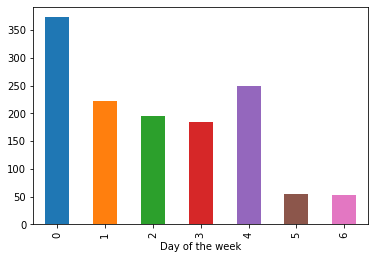

In [19]:
df_new.groupby('Day of the week')['amount'].mean().plot.bar()

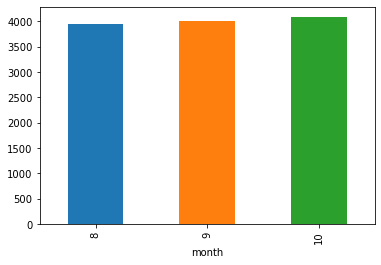

In [20]:
df_new.groupby('month')['transaction_id'].count().plot.bar()

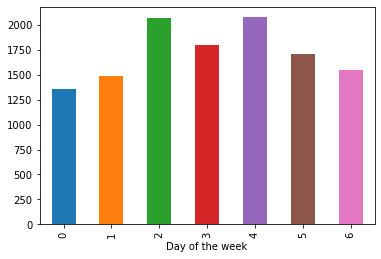

In [21]:
df_new.groupby('Day of the week')['transaction_id'].count().plot.bar()

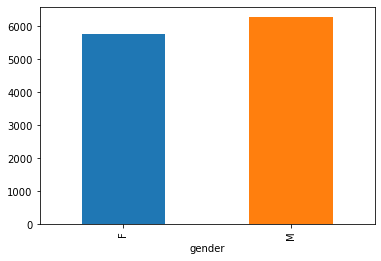

In [22]:
df_new.groupby('gender')['transaction_id'].count().plot.bar()

In [23]:
Location = df_new['long_lat'].str.split(' ', expand=True).rename(columns={0:'Longitude', 1:'Latitude'})

In [24]:
Location.shape

(12043, 2)

In [25]:
df_new['Longitude'] = Location['Longitude']
df_new['Latitude'] = Location['Latitude']

In [26]:
df_new.head()

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,...,amount,transaction_id,country,customer_id,movement,year,month,Day of the week,Longitude,Latitude
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,...,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,2018,8,2,153.41,-27.95
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,...,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,2018,8,2,153.41,-27.95
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,...,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,2018,8,2,151.23,-33.94
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,...,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,2018,8,2,153.10,-27.66
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,...,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,2018,8,2,153.41,-27.95


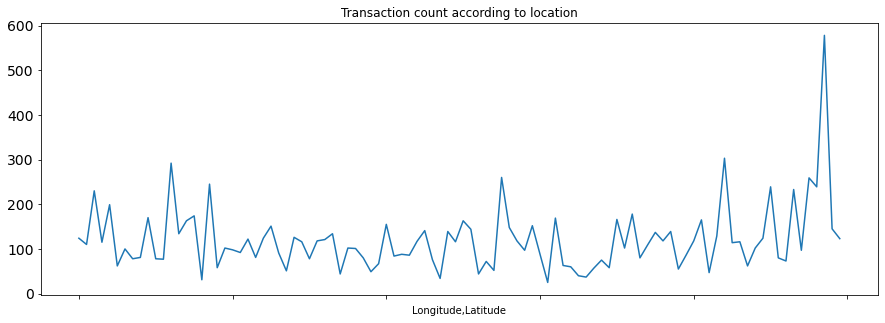

In [27]:
temp=df_new.groupby(['Longitude', 'Latitude'])['transaction_id'].count()

max(temp)
temp.plot(figsize=(15,5), title= 'Transaction count according to location', fontsize=14)

In [28]:
temp=df_new.groupby(['Latitude', 'Longitude'])['transaction_id'].count()
type(temp)
df_loc = temp.to_frame(name = 'count').reset_index()


In [29]:
df_loc = df_loc[:98]
df_loc.dtypes
df_loc['Latitude'] = df_loc['Latitude'].astype(float)
df_loc['Longitude'] = df_loc['Longitude'].astype(float)
df_loc.dtypes

Latitude     float64
Longitude    float64
count          int64
dtype: object

In [32]:
gmaps.configure(api_key="API_KEY")
locations = df_loc[['Latitude', 'Longitude']]
weights = df_loc['count']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))